In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys, os
sys.path.append('..')

import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from matplotlib import pyplot as plt

from get_data import get_data, get_splitted_data
from models.active_model import ActiveLearningExperiment
from models.strategy import *
from models.utils import ObstructedY

from misc.config import c
data_dir = c["DATA_DIR"]

import kaggle_ninja

from experiments.experiment_runner import run_experiment, run_experiment_grid
import experiments
from experiments import experiment_runner, fit_active_learning, fit_grid
from experiments.utils import *
from models.strategy import cosine_distance_normalized

from kaggle_ninja import *

In [ ]:
protein = '5ht6'
fingerprint = "ExtFP"
seed = 666

random = run_experiment("fit_grid",
                   recalculate_experiments=False,
                   n_jobs = 8,
                   experiment_detailed_name="fit_svm_passive_%s_%s" % (protein, fingerprint),
                   base_experiment="fit_active_learning",
                   seed=666,
                   base_experiment_kwargs={"strategy": "random_query",
                                           "loader_function": "get_splitted_data",
                                           "batch_size": 20,
                                           "base_model": "LinearSVC",
                                           "loader_args": {"n_folds": 2,
                                                           "seed": seed},
                                           "param_grid": {'C': list(np.logspace(-3,4,7))},
                                           "base_model_kwargs": { "loss": 'hinge'}})


uncertian = run_experiment("fit_grid",
                   recalculate_experiments=False,
                   n_jobs = 8,
                   experiment_detailed_name="fit_svm_uncertain_%s_%s" % (protein, fingerprint),
                   base_experiment="fit_active_learning",
                   seed=666,
                   base_experiment_kwargs={"strategy": "uncertanity_sampling",
                                           "loader_function": "get_splitted_data",
                                           "batch_size": 20,
                                           "base_model": "LinearSVC",
                                           "loader_args": {"n_folds": 2,
                                                           "seed": seed},
                                           "param_grid": {'C': list(np.logspace(-5,5,10))},
                                           "base_model_kwargs": { "loss": 'hinge'}})

In [ ]:
best_random_exp = get_best(random.experiments, "mean_mcc_valid")
best_uncertain_exp = get_best(uncertian.experiments, "mean_mcc_valid")

In [ ]:
plot_monitors([best_random_exp, best_uncertain_exp], folds='mean')

In [ ]:
calc_auc([best_random_exp, best_uncertain_exp], folds="mean")

In [ ]:
protein = '5ht6'
fingerprints = ["ExtFP"]
seed = 666

grid_result_greedy = run_experiment("fit_grid",
                                        recalculate_experiments=False,
                                        n_jobs = 2,
                                        experiment_detailed_name="fit_svm_greedy_%s_%s" % (protein, fingerprints),
                                        base_experiment="fit_active_learning",
                                        seed=666,
                                        grid_params = {"base_model_kwargs:C": list(np.logspace(-5,5,10)),
                                                       "base_model_kwargs:loss": ['hinge'],
                                                       "strategy_kwargs:c": list(np.linspace(0.1, 0.9, 9))},
                                        base_experiment_kwargs={"strategy": "quasi_greedy_batch",
                                                           "loader_function": "get_splitted_data",
                                                           "batch_size": 20,
                                                           "base_model": "LinearSVC",
                                                           "loader_args": {"n_folds": 2,
                                                                           "seed": 666}})

In [ ]:
best_greedy_exp = get_best(grid_result_greedy.experiments, "mean_mcc_valid")

In [ ]:
plot_monitors([best_passive_exp, best_uncertain_exp, best_greedy_exp], folds="mean")

# Balanced Models

In [3]:
protein = '5ht6'
fingerprint = "ExtFP"
seed = 666

In [ ]:
twelm_uncertain = run_experiment("fit_grid",
                                 recalculate_experiments=False,
                                 n_jobs = 8,
                                 experiment_detailed_name="fit_TWELM_uncertain_%s_%s" % (protein, fingerprint),
                                 base_experiment="fit_active_learning",
                                 seed=666,
                                 base_experiment_kwargs={"strategy": "uncertainty_sampling",
                                                         "loader_function": "get_splitted_data",
                                                         "batch_size": 20,
                                                         "base_model": "TWELM",
                                                         "loader_args": {"n_folds": 2,
                                                                         "seed": seed},
                                                         "param_grid": {'C': list(np.logspace(-3,4,7))}})

In [ ]:
eem_uncertainty = run_experiment("fit_grid",
                                 recalculate_experiments=False,
                                 n_jobs = 8,
                                 experiment_detailed_name="fit_EEM_uncertainty_%s_%s" % (protein, fingerprint),
                                 base_experiment="fit_active_learning",
                                 seed=666,
                                 base_experiment_kwargs={"strategy": "uncertainty_sampling",
                                                         "loader_function": "get_splitted_data",
                                                         "batch_size": 20,
                                                         "base_model": "EEM",
                                                         "loader_args": {"n_folds": 2,
                                                                         "seed": seed},
                                                         "param_grid": {'C': list(np.logspace(-3,4,7))}})


In [ ]:
svmtan_uncertainty = run_experiment("fit_grid",
                                    recalculate_experiments=False,
                                    n_jobs = 8,
                                    experiment_detailed_name="fit_SVMTAN_uncertainty_%s_%s" % (protein, fingerprint),
                                    base_experiment="fit_active_learning",
                                    seed=666,
                                    base_experiment_kwargs={"strategy": "uncertainty_sampling",
                                                            "loader_function": "get_splitted_data",
                                                            "batch_size": 20,
                                                            "base_model": "SVMTAN",
                                                            "loader_args": {"n_folds": 2,
                                                                            "seed": seed},
                                                            "param_grid": {'C': list(np.logspace(-3,4,7))}})

In [ ]:
nb_uncertainty = run_experiment("fit_grid",
                                recalculate_experiments=False,
                                n_jobs = 8,
                                experiment_detailed_name="fit_NB_uncertainty_%s_%s" % (protein, fingerprint),
                                base_experiment="fit_active_learning",
                                seed=666,
                                base_experiment_kwargs={"strategy": "uncertainty_sampling",
                                                        "loader_function": "get_splitted_data",
                                                        "batch_size": 20,
                                                        "base_model": "RandomNB",
                                                        "loader_args": {"n_folds": 2,
                                                                        "seed": seed},
                                                        "param_grid": {'h': list(np.linspace(100,500,5))}})

In [23]:
best_twelm_exp = get_best(twelm_uncertain.experiments, "auc")
best_eem_exp = get_best(eem_uncertainty.experiments, "auc")
best_svmtan_exp = get_best(svmtan_uncertainty.experiments, "auc")
best_nb_exp = get_best(nb_uncertainty.experiments, "auc")

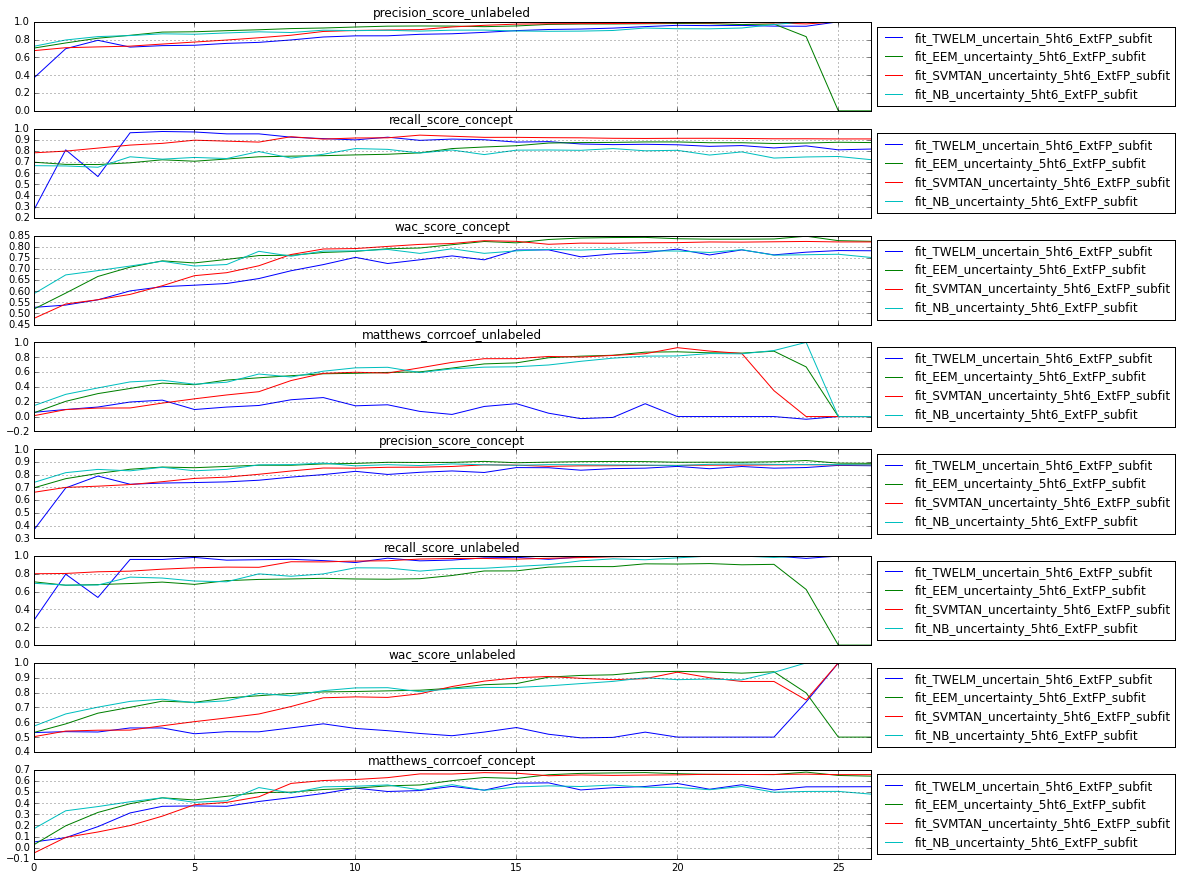

In [28]:
plot_monitors([best_twelm_exp, best_eem_exp, best_svmtan_exp, best_nb_exp], folds='mean')

In [13]:
best_twelm_exp = get_best(twelm_uncertain.experiments, "auc")

['precision_score_unlabeled', 'recall_score_concept', 'wac_score_concept', 'precision_score_concept', 'recall_score_unlabeled', 'wac_score_unlabeled', 'matthews_corrcoef_concept', 'matthews_corrcoef_unlabeled']


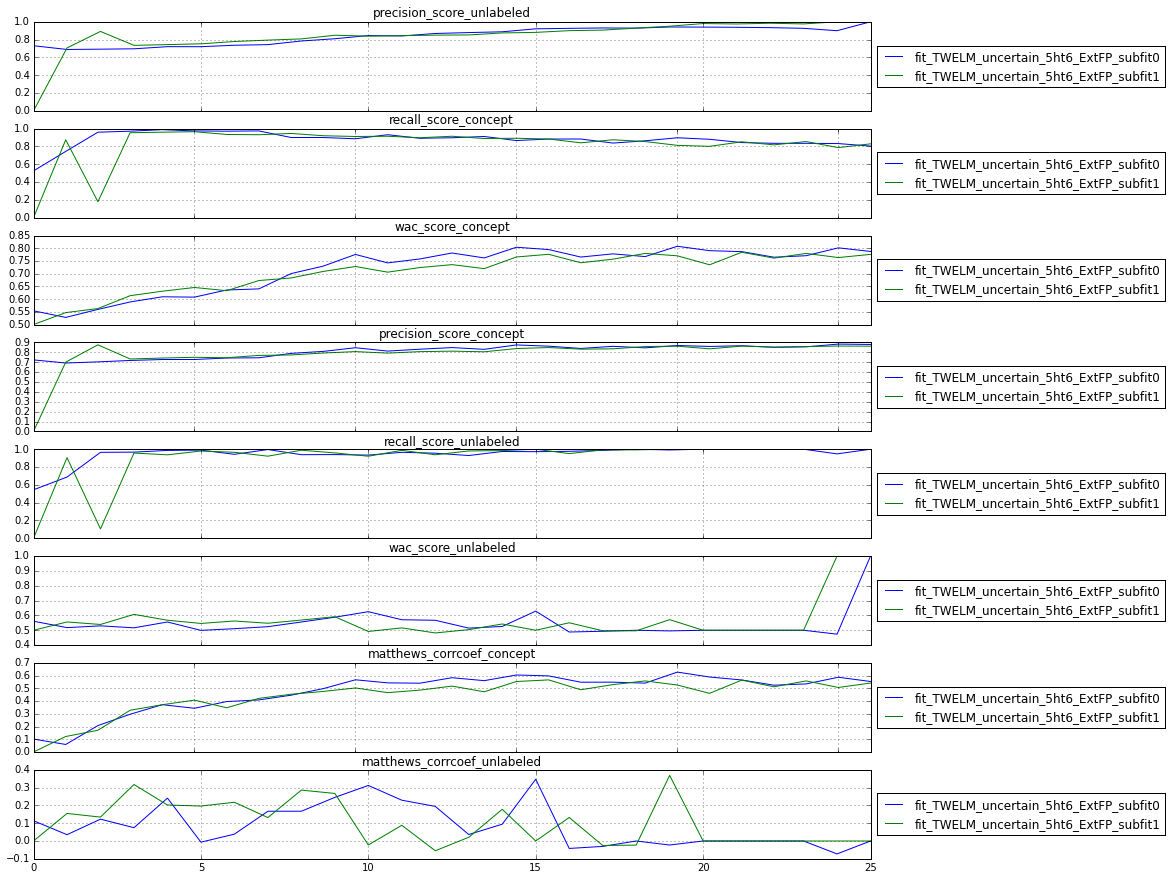

In [6]:
plot_monitors(best_twelm_exp, folds='all', keys='metrics')

['unlabeled_test_times', 'grid_times', 'strat_times', 'concept_test_times']


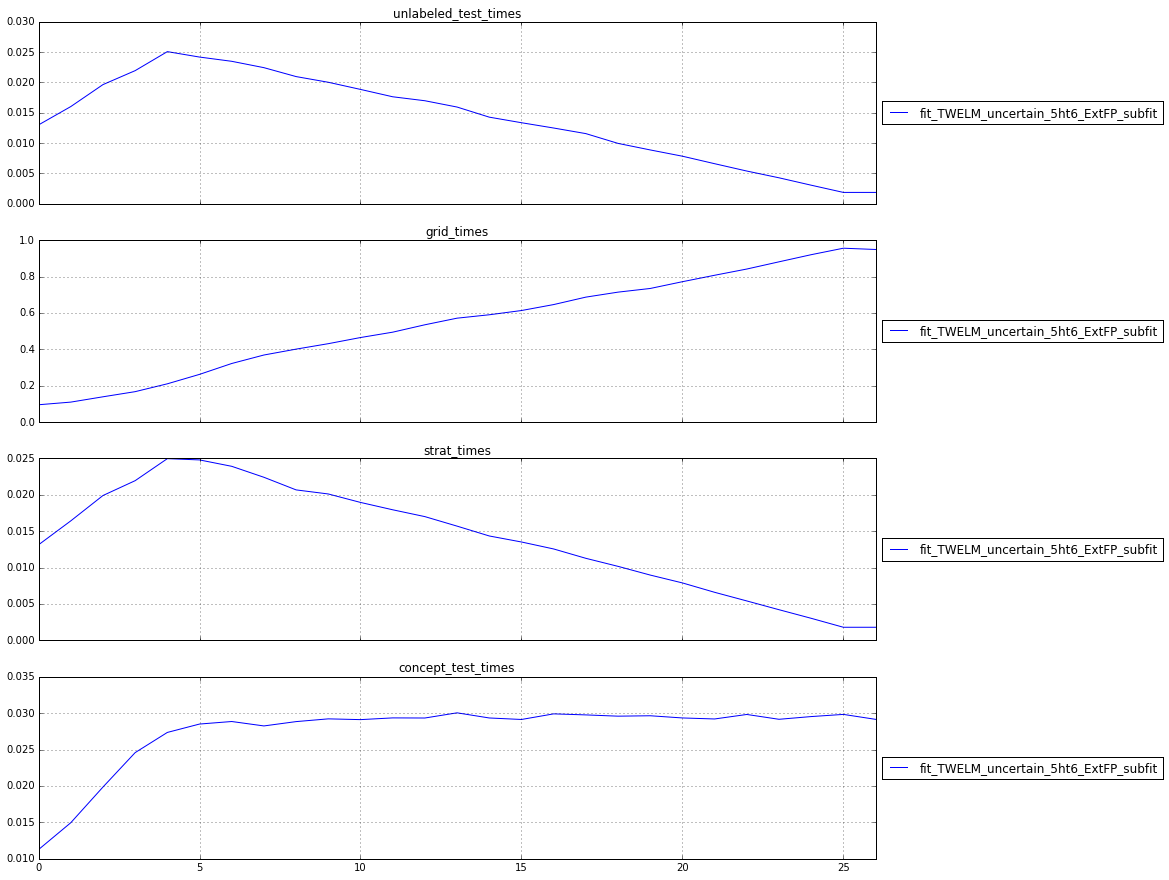

In [18]:
plot_monitors(best_twelm_exp, folds='mean', keys='times')

In [14]:
best_twelm_exp.monitors[0].keys()

['precision_score_unlabeled',
 'n_already_labeled',
 'recall_score_concept',
 'unlabeled_test_times',
 'wac_score_concept',
 'iter',
 'grid_times',
 'strat_times',
 'precision_score_concept',
 'recall_score_unlabeled',
 'concept_test_times',
 'wac_score_unlabeled',
 'matthews_corrcoef_concept',
 'matthews_corrcoef_unlabeled']

In [22]:
calc_auc(best_twelm_exp, folds='all')

fit_TWELM_uncertain_5ht6_ExtFP_subfit0 precision_score_unlabeled: 22.071589
fit_TWELM_uncertain_5ht6_ExtFP_subfit1 precision_score_unlabeled: 22.305640

fit_TWELM_uncertain_5ht6_ExtFP_subfit0 recall_score_concept: 23.031250
fit_TWELM_uncertain_5ht6_ExtFP_subfit1 recall_score_concept: 21.883523

fit_TWELM_uncertain_5ht6_ExtFP_subfit0 wac_score_concept: 18.718566
fit_TWELM_uncertain_5ht6_ExtFP_subfit1 wac_score_concept: 18.363359

fit_TWELM_uncertain_5ht6_ExtFP_subfit0 precision_score_concept: 21.070663
fit_TWELM_uncertain_5ht6_ExtFP_subfit1 precision_score_concept: 20.663470

fit_TWELM_uncertain_5ht6_ExtFP_subfit0 recall_score_unlabeled: 24.814931
fit_TWELM_uncertain_5ht6_ExtFP_subfit1 recall_score_unlabeled: 23.965209

fit_TWELM_uncertain_5ht6_ExtFP_subfit0 wac_score_unlabeled: 14.460541
fit_TWELM_uncertain_5ht6_ExtFP_subfit1 wac_score_unlabeled: 14.985685

fit_TWELM_uncertain_5ht6_ExtFP_subfit0 matthews_corrcoef_concept: 12.420113
fit_TWELM_uncertain_5ht6_ExtFP_subfit1 matthews_corrco